In [1]:
using Pkg
Pkg.activate()

using KadanoffBaym
#update KadanoffBaym
#Pkg.update(KadanoffBaym)
#Pkg.instantiate()

using LinearAlgebra
#using BlockArrays]
#Pkg.add("ChainRulesCore")
using ChainRulesCore

  Activating project at `~/.julia/environments/v1.9`


In [2]:
#Pkg.update(LinearAlgebra)
using LinearAlgebra

In [5]:
#import Pkg
#Pkg.add(path="/home/harsh/Work/code/KadanoffBaym.jl")

    Updating git-repo `/net/theorie/home/harsh/Work/code/KadanoffBaym.jl`
    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
   Installed Adapt ─────────────── v3.6.2
   Installed RecipesBase ───────── v1.3.4
   Installed DataAPI ───────────── v1.15.0
   Installed ArrayInterface ────── v7.4.4
   Installed RecursiveArrayTools ─ v2.38.5
   Installed MutableArithmetics ── v1.3.0
   Installed Polynomials ───────── v3.2.11
    Updating `/net/theorie/home/harsh/.julia/environments/v1.8/Project.toml`
  [82532805] + KadanoffBaym v1.3.0 `/net/theorie/home/harsh/Work/code/KadanoffBaym.jl#master`
    Updating `/net/theorie/home/harsh/.julia/environments/v1.8/Manifest.toml`
  [621f4979] + AbstractFFTs v1.3.1
  [79e6a3ab] + Adapt v3.6.2
  [4fba245c] + ArrayInterface v7.4.4
  [d360d2e6] + ChainRulesCore v1.16.0
  [34da2185] + Compat v4.6.1
  [9a962f9c] + DataAPI v1.15.0
  [e2d170a0] + DataValu

In [8]:
import Pkg; Pkg.add("Distributions")

   Resolving package versions...
   Installed HypergeometricFunctions ─ v0.3.16
   Installed InverseFunctions ──────── v0.1.9
   Installed ChangesOfVariables ────── v0.1.7
   Installed StatsBase ─────────────── v0.34.0
   Installed Distributions ─────────── v0.25.91
    Updating `/net/theorie/home/harsh/.julia/environments/v1.8/Project.toml`
  [31c24e10] + Distributions v0.25.91
    Updating `/net/theorie/home/harsh/.julia/environments/v1.8/Manifest.toml`
  [49dc2e85] + Calculus v0.5.1
  [9e997f8a] + ChangesOfVariables v0.1.7
  [864edb3b] + DataStructures v0.18.13
  [b429d917] + DensityInterface v0.4.0
  [31c24e10] + Distributions v0.25.91
  [fa6b7ba4] + DualNumbers v0.6.8
  [1a297f60] + FillArrays v1.0.0
  [34004b35] + HypergeometricFunctions v0.3.16
  [3587e190] + InverseFunctions v0.1.9
  [92d709cd] + IrrationalConstants v0.2.2
  [2ab3a3ac] + LogExpFunctions v0.3.23
  [e1d29d7a] + Missings v1.1.0
  [77ba4419] + NaNMath v1.0.2
  [90014a1f] + PDMats v0.11.17
  [1fd47b50] + QuadGK v2.8

In [9]:
using KadanoffBaym
using LinearAlgebra
using Distributions

[ Info: Precompiling KadanoffBaym [82532805-809c-4ef0-842b-4b00c5e9be5f]
[ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]


In [3]:
?GreenFunction

search: GreenFunction TimeOrderedGreenFunction



```
GreenFunction(g::AbstractArray, s::AbstractSymmetry)
```

A container interface for `g` with array indexing respecting some symmetry rule `s`. Because of that, `g` must be square in its last 2 dimensions, which can be resized  with [`resize!`](@ref).

The array `g` is not restricted to being contiguous. For example, `g` can have `Matrix{T}`, `Array{T,4}`, `Matrix{SparseMatrixCSC{T}}`, etc as its type.

# Notes

The GreenFunction *does not* own `g`. Proper care must be taken when using multiple GreenFunctions since using the same array will result in unexpected behaviour

```julia-repl
julia> data = zeros(2,2)
julia> g1 = GreenFunction(data, Symmetrical)
julia> g2 = GreenFunction(data, Symmetrical)
julia> g1[1,1] = 3
julia> @show g2[1,1]
julia> g1.data === g2.data # they share the same data
```

Indexing with less indices than the dimension of `g` results in a  "take-all-to-the-left" indexing

```julia-repl
julia> gf[i,j] == gf[:,:,...,:,i,j]
julia> gf[i,j,k] == gf[:,:,...,:,i,j,k]
```

Custom symmetries can be implemented via multiple dispatch

```julia-repl
julia> struct MySymmetry <: KadanoffBaym.AbstractSymmetry end
julia> @inline KadanoffBaym.symmetry(::Type{MySymmetry}) = conj
```

# Examples

`GreenFunction` simply takes some data `g` and embeds the symmetry `s` in its indexing

```julia-repl
julia> time_dim = 3
julia> spin_dim = 2
julia> data = zeros(spin_dim, spin_dim, time_dim, time_dim)
julia> gf = GreenFunction(data, Symmetrical)
julia> gf[2,1] = rand(spin_dim, spin_dim)
julia> @show gf[1,2]
julia> @show KadanoffBaym.symmetry(Symmetrical)(gf[2,1])
```


In [4]:
"""
    Response

Defined as 
`` G(t,t') = 0 if t' > t ``
"""
struct Response <: KadanoffBaym.AbstractSymmetry end

@inline KadanoffBaym.symmetry(::Type{Response}) = zero


In [5]:
#Parameters
k2 = 1.
k1 = 1.
k3 = 1.

init = 4/3

1.3333333333333333

In [6]:
dim  = 1
#resp = retarded(TimeOrderedGreenFunction(zeros(Float64, dim, dim),zeros(Float64, dim, dim)))

#resp = TimeOrderedGreenFunction(zeros(Float64, dim, dim),zeros(Float64, dim, dim))

#resp_gf = GreenFunction(zeros(Float64, dim, dim),Symmetrical)

resp_gf = GreenFunction(zeros(Float64, dim, dim),Response)


#resp_gf = GreenFunction(zeros(ComplexF64, 1, 1), SkewHermitian)

#φ = GreenFunction(zeros(ComplexF64, 1), OnePoint)

1×1 GreenFunction{Float64, 2, Matrix{Float64}, Response}:
 0.0

In [7]:
mu   = GreenFunction(zeros(Float64, dim), OnePoint)
mu[1] = 0

0

In [16]:
resp_gf[1, 1] = 1.;
mu[1] = init;

function fv!(out, ts, h1, h2, t, t′)
    #out[1] = -k2*resp_gf[t,t'] -2*k3*mu[t]*resp_gf[t,t']
    
    #out[1] = k2*resp_gf[t,t'] 2*k3*mu[t]*resp_gf[t,t']
    
    out[1] = 0.
    
    #if resp_gf[:,t'] > 0.
    #    out[1] = -k2*resp_gf[t,t'] -2*k3*mu[t]*resp_gf[t,t']
    #else
    #    out[1] = 0.
    #end
    #out[1] = zero(out[1])
end

In [17]:
function fv!(out, _, _, _, t, t′)
    
    out[1] = -k2*resp_gf[t,t′] -2*k3*mu[t]*resp_gf[t,t′]
    #out[1] = k2*resp_gf[t,t'] 2*k3*mu[t]*resp_gf[t,t']

end

fv! (generic function with 1 method)

In [18]:
function fd!(out, _, _, _, t, t′)
    #out[1] = Dirac(t-t′)
    #out[1] = 1.
    #out[1] = 0.
    out[1] = zero(out[1])
end

fd! (generic function with 1 method)

In [19]:
# one-time equation for condensate amplitude
function f1!(out, _, _, t)
    out[1] = k1 - k2*mu[t] -k3*mu[t]^2
end

f1! (generic function with 1 method)

In [20]:
# call the solver
sol = kbsolve!(fv!, fd!, [resp_gf,], (0.0, 2.5); atol=1e-6, rtol=1e-4, v0 = [mu,], f1! =f1!);

In [21]:
sol.t

554-element Vector{Float64}:
 0.0
 1.0e-6
 5.999999999999999e-6
 1.2289807877832215e-5
 1.87894543478967e-5
 3.6213076367279186e-5
 6.59655905945347e-5
 0.00011743174539371399
 0.00018892346475351933
 0.0002990633107595303
 0.00044054912110087606
 0.0006343250793034794
 0.0008681497650817063
 ⋮
 2.426480474482194
 2.433712631980188
 2.440951681315592
 2.448197612492548
 2.4554504155778996
 2.462710080700648
 2.4699765980514172
 2.4772499578819196
 2.484530150504424
 2.491817166291229
 2.49911099567414
 2.5

In [27]:
Pkg.build("PyCall")

    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/e32a90da027ca45d84678b826fffd3110bb3fc90/build.log`
    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/62f417f6ad727987c755549e9cd88c46578da562/build.log`


   Resolving package versions...
  No Changes to `/net/theorie/home/harsh/.julia/environments/v1.8/Project.toml`
  No Changes to `/net/theorie/home/harsh/.julia/environments/v1.8/Manifest.toml`
[ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]


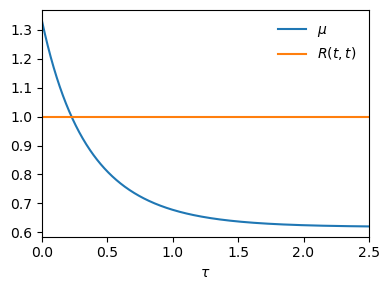

In [28]:
Pkg.add("PyPlot")
using PyPlot
let
    fig = figure(figsize=(4, 3))

    ax = subplot(111)
    plot(sol.t, mu[:] , ls="-", c="C0", label="\$\\mu \$", lw=1.5)
    plot(sol.t, [resp_gf[k, k] for k in 1:size(sol.t)[1]] |> real, ls="-", c="C1", label="\$R(t,t)\$", lw=1.5)
    ax.set_xlabel("\$ \\tau \$")
    ax.set_xlim(0, sol.t[end])
    #ax.set_ylim(0.0, 1.0)
    ax.legend(frameon=false)
    tight_layout()
    fig
end;

In [29]:
mu[:]

554-element Vector{Float64}:
 1.3333333333333333
 1.3333291111188519
 1.3333185557374616
 1.3333052777480845
 1.3332915571043131
 1.3332547777460158
 1.3331919788777187
 1.3330833650278864
 1.332932523355715
 1.3327002146502887
 1.332401928137211
 1.3319936521402556
 1.331501381347439
 ⋮
 0.620421972242127
 0.6203836250410014
 0.6203458586061525
 0.6203086647805552
 0.6202720355102697
 0.6202359628433444
 0.6202004389287282
 0.6201654560151891
 0.6201310064502412
 0.62009708267908
 0.6200636772435252
 0.6200596428344843

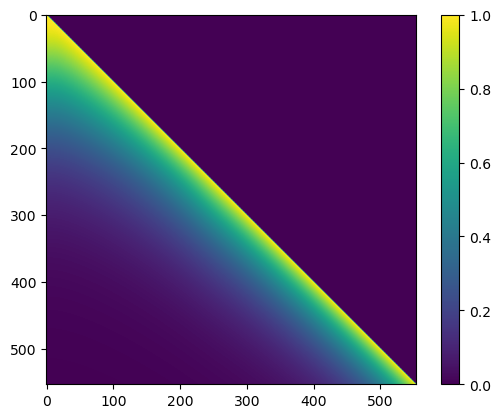

PyObject <matplotlib.colorbar.Colorbar object at 0x7f342d01c8d0>

In [30]:
imshow(resp_gf[:,:])
colorbar()

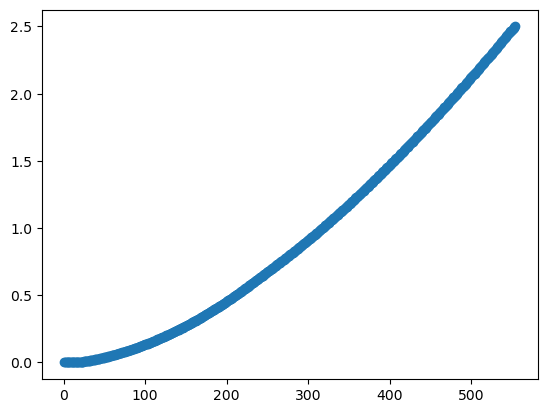

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f342bf84ed0>

In [31]:
plot(1:length(sol.t),sol.t,marker="o")

## Compare to Vanilla MAK:

In [79]:
function mak_eqn(mu_new)
    #out = k1 - k2*mu_new[t] -k3*mu_new[t]^2
    out = k1 - k2*mu_new -k3*mu_new^2
    
    return out
    
end

mak_eqn (generic function with 1 method)

In [80]:
y    = zeros(length(sol.t));
y[1] = init;

In [81]:
for i in 1:length(y)-1
    y[i+1] = y[i] + (sol.t[i+1]-sol.t[i])*mak_eqn(y[i])
end

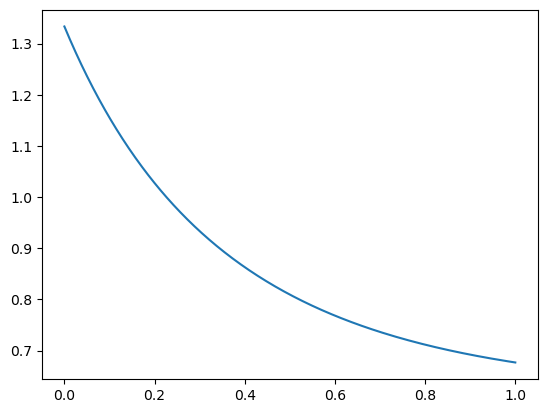

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f342b0fbb10>

In [82]:
plot(sol.t, y[:])

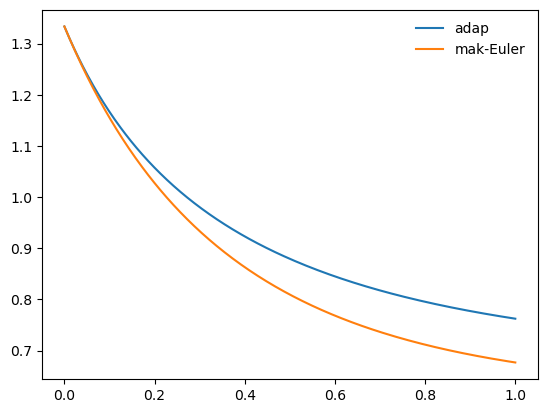

PyObject <matplotlib.legend.Legend object at 0x7f342ab3d790>

In [83]:
plot(sol.t, mu[:], label="adap")
plot(sol.t, y[:],  label ="mak-Euler")
legend(frameon=false)

## Add the first non-trivial correction and then solve:

Need to define a function which calculates the self-energy, one that calculates the integral, and finally one that gives the time update:

In [8]:
#Initialization
dim     = 1 #Num of response functions
resp_gf = GreenFunction(zeros(Float64, dim, dim), Response)
mu      = GreenFunction(zeros(Float64, dim), OnePoint)
sigma   = zero(resp_gf)

resp_gf[1, 1] = 1.;
mu[1]         = init;

In [9]:
# Callback function for the self-energies
function self_energy!(resp_gf, mu, sigma, times, h1, h2 , t, t′)
        
    # Resize self-energies when Green functions are resized    
    if (n = size(resp_gf, 2)) > size(sigma, 2)
        resize!(sigma, n)
    end
    
    id = one(sigma[1:t,1:t])
    
    #shifted = circshift(resp_gf[1:t,1:t].^2,(0,-1))
    shifted = circshift(resp_gf[1:t,1:t].^2,(-1,0))
    
    for k in 1:t
        shifted[k,1:t] .*= h1
    end
    
    sigma[t,t′] = ((resp_gf[1:t,1:t].^2)*inv(tril(id +2*k3*shifted[:,:])))[t,t′]

end

self_energy! (generic function with 1 method)

In [10]:
# Right-hand side for the "vertical" evolution
function fv!(resp_gf, mu, sigma, out, times, h1, h2, t, t′)
    
    # Equations of motion
    out[1] = -k2*resp_gf[t,t′] -2*k3*mu[t]*resp_gf[t,t′] +4*k3^2*integrate2(h1, t, t′, sigma, resp_gf, mu)
    return out
    
end

fv! (generic function with 1 method)

In [11]:
#diagonal evolution
function fd!(resp_gf, mu, sigma, out, times, h1, h2, t, t′)
    out[1] = zero(out[1])
end

fd! (generic function with 1 method)

In [12]:
# one-time equation for condensate amplitude
function f1!(resp_gf, mu, sigma, out, times, h1, t)
    out[1] = k1 - k2*mu[t] -k3*mu[t]^2 + 2*k3^2*integrate1(h1, t, sigma, mu)
end

f1! (generic function with 1 method)

In [13]:
function integrate1(hs::Vector, t1, Σ::GreenFunction, μ::GreenFunction; tmax=t1)
    retval = zero(μ[t1])
    
    for k in 1:tmax
        retval += Σ[t1,k]*μ[k]^2*hs[k]
    
    #@inbounds for k in 1:tmax
        #@views LinearAlgebra.mul!(retval, Σ[t1,k], μ[k]^2, hs[k], 1.0)
        #@views LinearAlgebra.mul!(retval, A[t1, k] - B[t1, k], C[k, t2], hs[k], 1.0)
    end
    return retval
end

function integrate2(hs::Vector, t1, t2, Σ::GreenFunction, R::GreenFunction, μ::GreenFunction; tmax=t1)
    
    #retval = zero(Σ[t1,t1])
    retval = zero(R[t1,t2])
    #@inbounds for k in t2:tmax
        #@views LinearAlgebra.mul!(retval, Σ[t1,k].*μ[k]^2,R[k,t2], hs[k], 1.0)
        #@views LinearAlgebra.mul!(retval, Σ[t1,k], R[k,t2], hs[k], 1.0)
    #end
    
    for k in t2:t1
        retval += Σ[t1,k].*μ[k]*R[k,t2]*hs[k]
    
    end
    
    #retval = zero(Σ)
    #print(retval)
    #print(size(retval,1))
    #Σμ = zero(Σ)
    #for k in 1:t1
        #Σμ[t1,k] = Σ[t1, k].*μ[k]
    #end
    
    #@inbounds for k in t2:tmax
    #if size(retval,1) > 0
        #@inbounds for k in 1:tmax
            #@views LinearAlgebra.mul!(retval, Σ[t1,k], μ[k]^2, hs[k], 1.0)
            #@views LinearAlgebra.mul!(retval, Σ[t1,k], R[k,t2], hs[k], 1.0)
        #end
    #end
    #LinearAlgebra.mul!(retval, Σ[t1,:], R[:,t2], hs[:], 1.0)
    return retval
end

integrate2 (generic function with 1 method)

In [71]:
integrate1(sol.w[80], 80, sigma, mu)

0.0985467049398685

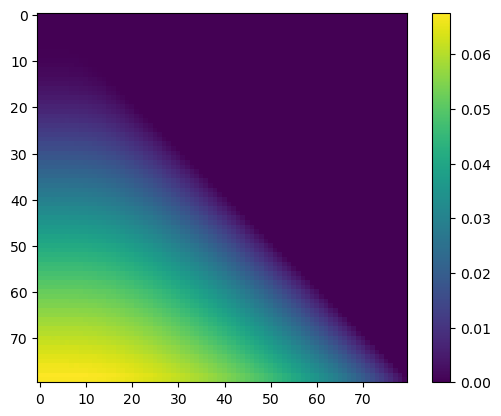

PyObject <matplotlib.colorbar.Colorbar object at 0x7f342b3fc8d0>

In [70]:
temp = zeros(80,80)
for t1 in 1:80
    for t2 in 1:80
        temp[t1,t2] = integrate2(sol.w[80], t1, t2, sigma, resp_gf, mu)
    end
end
imshow(temp)
plt.colorbar()

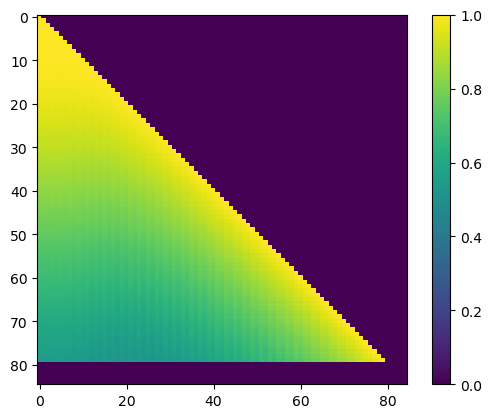

PyObject <matplotlib.colorbar.Colorbar object at 0x7f342b32c8d0>

In [69]:
temp = zero(resp_gf)
for t1 in 1:80
    for t2 in 1:t1
        temp[t1,t2] = self_energy!(resp_gf, mu, temp, 1, sol.w[t1], sol.w[t2] , t1, t2)
    end
end
imshow(temp[:,:])
plt.colorbar()

In [515]:
plt.plot(sol.w[-1])

LoadError: BoundsError: attempt to access 319-element Vector{Vector{Float64}} at index [-1]

In [14]:
tmax = 2.;
#atol = 1e-8
#rtol = 1e-6;

atol = 1e-6
rtol = 1e-4;

In [15]:
@time sol = kbsolve!(
    (x...) -> fv!(resp_gf, mu, sigma, x...),
    (x...) -> fd!(resp_gf, mu, sigma, x...),
    [resp_gf],
    (0.0, tmax);
    callback = (x...) -> self_energy!(resp_gf, mu, sigma, x...),
    atol = atol,
    rtol = rtol,
    stop = x -> (println("t: $(x[end])"); flush(stdout); false),
    v0 = [mu,],
    f1! = (x...) -> f1!(resp_gf, mu, sigma, x...)
);

t: 0.0
t: 1.0e-6
t: 5.999999999999999e-6
t: 1.228980514610701e-5
t: 1.8789446195283415e-5
t: 3.6213043251453905e-5
t: 6.596549546983456e-5
t: 0.00011743130035842321
t: 0.00018892247877220022
t: 0.0002990600837579919
t: 0.0004405432281403776
t: 0.0006343103351734999
t: 0.0008681258481325369
t: 0.0011631001323672903
t: 0.0015030057666434752
t: 0.0019073206054969647
t: 0.0023577125156643646
t: 0.002871296497412931
t: 0.0034293972209064522
t: 0.004046726163965818
t: 0.004705488181437186
t: 0.005418282823125643
t: 0.006168839051706049
t: 0.006968037973377114
t: 0.007801336402937221
t: 0.008678278103037911
t: 0.009585981752774354
t: 0.010532978964251729
t: 0.011507850548091973
t: 0.012518376703962086
t: 0.013554355312839047
t: 0.014623017286028089
t: 0.015715136484247445
t: 0.016837548246106625
t: 0.017981788393134808
t: 0.019154412303392956
t: 0.020347538527493984
t: 0.021567528883202933
t: 0.022806939889985292
t: 0.024072004149630427
t: 0.025355601953251733
t: 0.02666388452936303
t: 0.0279

t: 1.542487981899966
t: 1.5489127028877843
t: 1.5553536326206048
t: 1.561797545118933
t: 1.5682576290728514
t: 1.5747206456281493
t: 1.5811997965525952
t: 1.587681830327373
t: 1.5941799615914902
t: 1.600680926369318
t: 1.6071979519668145
t: 1.613717762157022
t: 1.6202535967107108
t: 1.6267921673527803
t: 1.6333467261188153
t: 1.6399039728864722
t: 1.6464771717582833
t: 1.6530530109632868
t: 1.6596447664752183
t: 1.6660670552011634
t: 1.6724439218522091
t: 1.678983364338243
t: 1.6854972203968113
t: 1.6920314444968578
t: 1.6985991832491323
t: 1.7051803078516439
t: 1.7117903149127456
t: 1.7184103261235104
t: 1.7250552217813522
t: 1.7315329648153677
t: 1.737969422496348
t: 1.7443619771175594
t: 1.7509079530690066
t: 1.757454582283534
t: 1.7640300727738005
t: 1.7706500924644926
t: 1.7772896511314065
t: 1.7839656480852961
t: 1.790478501234344
t: 1.7969557753195342
t: 1.8033940195810712
t: 1.8099920561182554
t: 1.8165949688031608
t: 1.823229740112198
t: 1.8299127273911506
t: 1.836437742922417

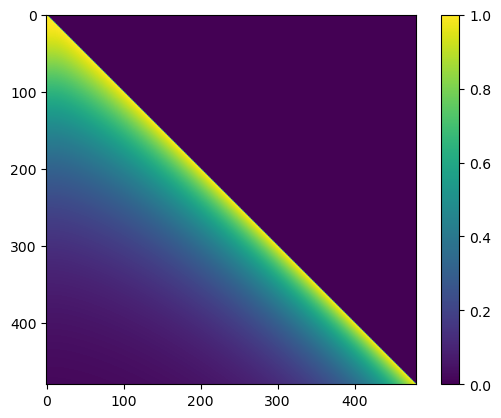

PyObject <matplotlib.colorbar.Colorbar object at 0x7fcdbeb64b50>

In [22]:
using PyPlot
PyPlot.imshow(resp_gf[:,:])
colorbar()

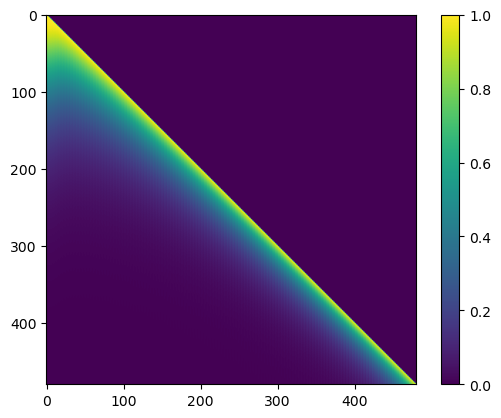

PyObject <matplotlib.colorbar.Colorbar object at 0x7fcdbec0c4d0>

In [23]:
imshow(sigma[:,:])
colorbar()

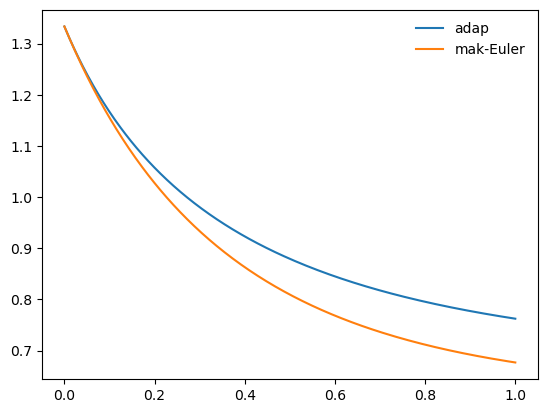

PyObject <matplotlib.legend.Legend object at 0x7f342b115790>

In [84]:
plot(sol.t, mu[:], label="adap")
#plot(sol.t, y[:],  label ="mak-Euler")
legend(frameon=false)

In [16]:
#touch("data/momentClosure/MM1_KM_scaleSubstrate_2/alpha_"*string(i)*".csv")
using DelimitedFiles

touch("/home/harsh/Work/code/KadanoffBaym.jl/data/AA_A_1_explicit.csv")

abc = open("/home/harsh/Work/code/KadanoffBaym.jl/data/AA_A_1_explicit.csv", "w")
mn = convert(Array,mu[:])
    
writedlm(abc, vcat(transpose(sol.t),transpose(mn))) 
close(abc)

## Using the fix point method to solve the equation:
The issue that I see is that, one needs a lot of matrix inversion to cover the entire t,t' grid because the function fv seems to be called for each t,t'!

In [509]:
#Initialization
dim     = 1 #Num of response functions
resp_gf = GreenFunction(zeros(Float64, dim, dim), Response)
mu      = GreenFunction(zeros(Float64, dim), OnePoint)
sigma   = zero(resp_gf)

resp_gf[1, 1] = 1.;
mu[1]         = init;

In [510]:
function fixed_point(F::Function, x0::AbstractArray; 
        mixing::Float64=0.5, 
        abstol::Float64=1e-12, 
        maxiter::Int=1000, 
        verbose::Bool=true, 
        norm=x -> LinearAlgebra.norm(x, Inf)
    )
    
    x_old = copy(x0)

    step = 0
    
    while step < maxiter
        
        x = F(x_old)        
        res = norm(x - x_old)
        
        if verbose
            @info "step: $step // res: $res"
        end
        if res < abstol
            break
        end
        @. x_old = mixing * x + (1.0 - mixing) * x_old
        #x_old = mixing * x + (1.0 - mixing) * x_old
        step += 1
    end

    if step == maxiter
        @warn "No convergence reached."
    end
    
    return x_old[1]
end

fixed_point (generic function with 3 methods)

In [511]:
# Callback function for the self-energies
function self_energy_fixed_point!(resp_gf, mu, sigma, times, h1, h2 , t, t′)
    
    #if (n = size(resp_gf, 2)) > size(sigma, 2)
        #resize!(sigma, n)
    #end
    #shifted = circshift(resp_gf[:,:].^2,(-1,0))
    #shifted = circshift(resp_gf[1:t,1:t].^2,(-1,0))
    
    if (n = size(resp_gf, 2)) > size(sigma, 2)
        resize!(sigma, t)
    end
    shifted = (resp_gf[1:t,1:t].^2)
    
    for k in 1:t
        #shifted[k,1:t] .*= h1
        shifted[1:t,k] .*= h1
    end
    
    x = [resp_gf[t,t′].^2]
    
    # Solve VIEs implicitly (uncached version)
    sigma[t, t′] = fixed_point(x; mixing=0.5, verbose=false, abstol=1e-12) do x
        sigma[t, t′] = x[1]
            [resp_gf[t,t′].^2 - (sigma*tril(2*k3*shifted[:,:]))[t, t′]]
    end
    #print(sigma[t,t′],'\n')
    
end

self_energy_fixed_point! (generic function with 2 methods)

In [512]:
# Right-hand side for the "vertical" evolution
function fv!(resp_gf, mu, sigma, out, times, h1, h2, t, t′)
    
    # Equations of motion
    out[1] = -k2*resp_gf[t,t′] -2*k3*mu[t]*resp_gf[t,t′] +4*k3^2*integrate2(h1, t, t′, sigma, resp_gf, mu)
    return out
    
end

#diagonal evolution
function fd!(resp_gf, mu, sigma, out, times, h1, h2, t, t′)
    out[1] = zero(out[1])
end

# one-time equation for condensate amplitude
function f1!(resp_gf, mu, sigma, out, times, h1, t)
    out[1] = k1 - k2*mu[t] -k3*mu[t]^2 + 2*k3^2*integrate1(h1, t, sigma, mu)
end

f1! (generic function with 2 methods)

In [513]:
function integrate1(hs::Vector, t1, Σ::GreenFunction, μ::GreenFunction; tmax=t1)
    retval = zero(μ[t1])
    
    for k in 1:tmax
        retval += Σ[t1,k]*μ[k]^2*hs[k]
    
    end
    return retval
end

function integrate2(hs::Vector, t1, t2, Σ::GreenFunction, R::GreenFunction, μ::GreenFunction; tmax=t1)
    
    retval = zero(R[t1,t2])
    
    for k in t2:t1
        retval += Σ[t1,k].*μ[k]*R[k,t2]*hs[k]
    
    end
    return retval
end

integrate2 (generic function with 1 method)

In [514]:
tmax = 0.1

@time sol = kbsolve!(
    (x...) -> fv!(resp_gf, mu, sigma, x...),
    (x...) -> fd!(resp_gf, mu, sigma, x...),
    [resp_gf],
    (0.0, tmax);
    callback = (x...) -> self_energy_fixed_point!(resp_gf, mu, sigma, x...),
    atol = atol,
    rtol = rtol,
    stop = x -> (println("t: $(x[end])"); flush(stdout); false),
    v0 = [mu,],
    f1! = (x...) -> f1!(resp_gf, mu, sigma, x...)
);

t: 0.0
t: 1.0e-6
t: 5.999999999999999e-6
t: 1.2289805146108619e-5
t: 1.8789446195308812e-5


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30


t: 3.621304325171314e-5


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30


t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30


t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30


t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30


t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30


t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30


t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30


t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30


t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30


t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30


t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30


t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

t: NaN


┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning: No convergence reached.
└ @ Main In[510]:30
┌ Warning:

LoadError: InterruptException:

In [508]:
plot(sol.t, mu[:], label="adap")

LoadError: PyError ($(Expr(:escape, :(ccall(#= /home/harsh/.julia/packages/PyCall/twYvK/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'ValueError'>
ValueError('x and y must have same first dimension, but have shapes (319,) and (51,)')
  File "/usr/lib64/python3.11/site-packages/matplotlib/pyplot.py", line 2748, in plot
    return gca().plot(
           ^^^^^^^^^^^
  File "/usr/lib64/python3.11/site-packages/matplotlib/axes/_axes.py", line 1668, in plot
    lines = [*self._get_lines(*args, data=data, **kwargs)]
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib64/python3.11/site-packages/matplotlib/axes/_base.py", line 311, in __call__
    yield from self._plot_args(
               ^^^^^^^^^^^^^^^^
  File "/usr/lib64/python3.11/site-packages/matplotlib/axes/_base.py", line 504, in _plot_args
    raise ValueError(f"x and y must have same first dimension, but "


## Do multiple species with a proper data structure:

### Try $A+B \rightarrow C$ first: